https://drive.google.com/file/d/1l_O9ypTixG56zIRTg14Zt3KdSC5vnjz5/view?usp=share_link

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

df = pd.read_csv('yield_df.csv')
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [3]:
## Droping of 'Unnamed: 0' and 'Year' column

df.drop(['Unnamed: 0', 'Year'], axis = 1, inplace = True)
df.sample(10)

,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
26127,Switzerland,Potatoes,390936,1537.0,1526.60,8.42
11408,India,Maize,15946,1083.0,61257.00,25.44
9567,Guatemala,Potatoes,224631,1996.0,9665.14,19.47
4189,Brazil,Soybeans,28133,1761.0,304031.00,25.95
22667,Pakistan,"Rice, paddy",31604,494.0,6925.13,27.29
5818,Canada,Maize,62844,537.0,39667.00,6.93
27676,United Kingdom,Potatoes,438841,1220.0,16770.87,7.43
27123,Turkey,Maize,89499,593.0,39440.00,16.02
24526,Slovenia,Wheat,41907,1162.0,1280.98,10.56
16873,Japan,Soybeans,16392,1668.0,61164.07,16.53


#### Observations :-

1) ['Area', 'Item', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'] are predictors.
       
2) ['hg/ha_yield'] is Response variable.

In [4]:
## Check for missing values and data types of each columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   hg/ha_yield                    28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  float64
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.3+ MB


#### Observations :-

1) No Null values.

# EDA

In [5]:
## to get the country which produces the most

df.groupby(['Area'])['hg/ha_yield'].sum().sort_values(ascending=False)

Area
India         327420324
Brazil        167550306
Mexico        130788528
Japan         124470912
Australia     109111062
                ...    
Namibia         3165475
Sudan           1896346
Montenegro      1645100
Eritrea         1452416
Botswana         470651
Name: hg/ha_yield, Length: 101, dtype: int64

#### Observations :-

India is the largest producer of crops.

In [6]:
## to get the Item which is to be produced the most

df.groupby(['Item'])['hg/ha_yield'].sum().sort_values(ascending=False)

Item
Potatoes                854351426
Sweet potatoes          344077024
Cassava                 307730510
Maize                   149633801
Rice, paddy             137994713
Wheat                   116158445
Yams                     96676873
Plantains and others     58958974
Sorghum                  56634127
Soybeans                 53924312
Name: hg/ha_yield, dtype: int64

#### Observations :-

Potatoes is produced most among all the crops.

In [7]:
## to get the top producer for each items

groupby_item_area = df.groupby(['Item', 'Area'])['hg/ha_yield'].sum().sort_values(ascending=False).reset_index()

for i in groupby_item_area['Item'].unique():
    print(groupby_item_area[groupby_item_area['Item']==i].iloc[0, :])
    print('--------------------------------------------------')

Item             Cassava
Area               India
hg/ha_yield    142810624
Name: 0, dtype: object
--------------------------------------------------
Item           Potatoes
Area              India
hg/ha_yield    92122514
Name: 1, dtype: object
--------------------------------------------------
Item           Sweet potatoes
Area                    India
hg/ha_yield          44439538
Name: 5, dtype: object
--------------------------------------------------
Item               Yams
Area              Japan
hg/ha_yield    29165394
Name: 14, dtype: object
--------------------------------------------------
Item           Rice, paddy
Area                 India
hg/ha_yield       15329644
Name: 25, dtype: object
--------------------------------------------------
Item              Wheat
Area              India
hg/ha_yield    13432694
Name: 27, dtype: object
--------------------------------------------------
Item              Maize
Area             Canada
hg/ha_yield    10721406
Name: 34, dtype: ob

#### Observations :-

1) India is the largest producer of Cassava, Potatoes, Sweet potatoes, Rice, Paddy and Wheat.

2) Japan is the largest producer of Yams.

3) Canada is the largest producer of Maize.

4) Guatemala is the largest producer of Plantains and others.

5) Mexico is the largest producer of Sorghum.

6) Brazil is the largest producer of Soybeans.

In [8]:
## Correlation table

df[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].corr()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
hg/ha_yield,1.000000,0.000962,0.064085,-0.114777
average_rain_fall_mm_per_year,0.000962,1.000000,0.180984,0.313040
pesticides_tonnes,0.064085,0.180984,1.000000,0.030946
avg_temp,-0.114777,0.313040,0.030946,1.000000


#### Observatons :-

1) Corr. between average_rain_fall and yield is very small.

2) Corr. between pesticides and yield is also small.

3) There is no Multi-colinearity.

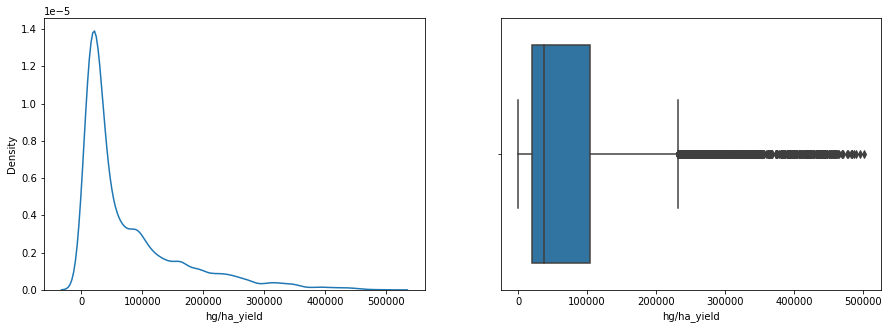

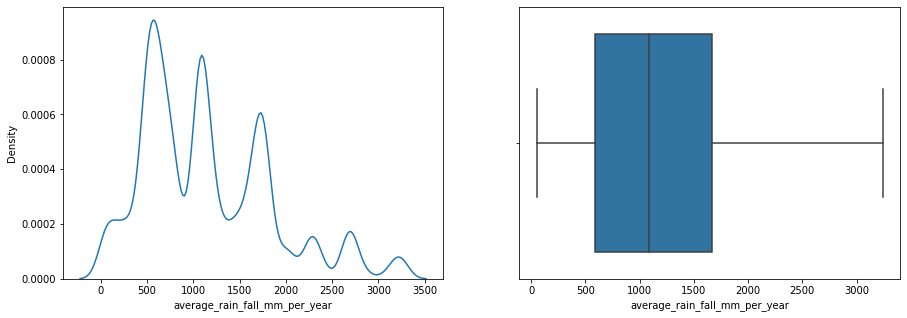

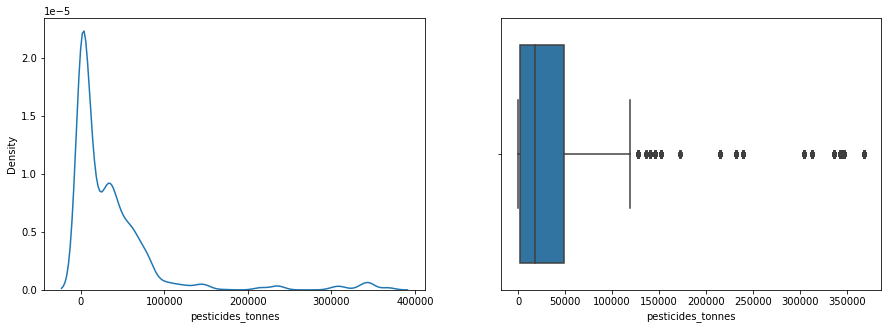

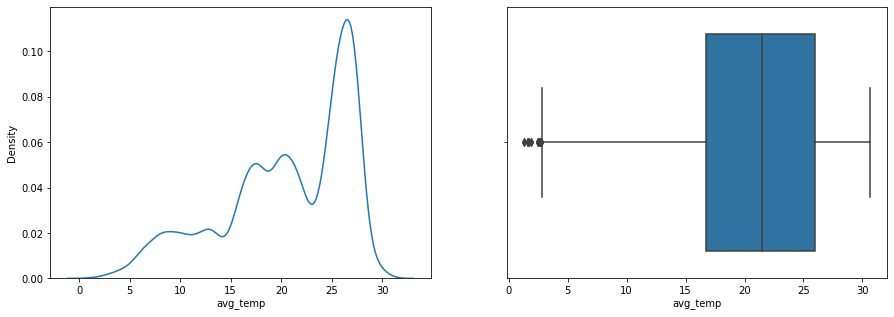

In [9]:
## Distplot and boxplot of columns

import seaborn as sns
import matplotlib.pyplot as plt

numerical_col = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']



for i in numerical_col :
    fig, x = plt.subplots(1,2, figsize=(15, 5))
    sns.distplot(df[i], hist=False, ax = x[0])
    sns.boxplot(data = df, x = df[i], ax = x[1])
    plt.show()

#### Observations :-

1) yield is Right skewed and it has outliers.

2) average_rain_fall is Right skewed, Multi-model and it doesn't has outliers.

3) pesticides is Right skewed and it has some outliers.

4) avg_temp is Left skewed and it has some outliers.

# Data Preprocessing and Feature engineering

### Feature Transformation

In [10]:
## Feature transformation

from sklearn.preprocessing import PowerTransformer

df0 = df.copy()

def apply_transform(transform, X):                  # calling this function we can apply any transform on the particular column
    
    trf = PowerTransformer(method=transform)         # np.log1p add 1 in np.log i.e. np.log1p = np.log + 1 so that it can also deal with log0

    df0[X] = trf.fit_transform(df0[X].to_numpy().reshape(-1, 1))
    
    # plotting Distplot and boxplot
    fig, x = plt.subplots(1,2, figsize=(15, 5))
    sns.distplot(df0[X], hist=False, ax = x[0])
    sns.boxplot(data = df0, x = df0[X], ax = x[1])
    plt.show()

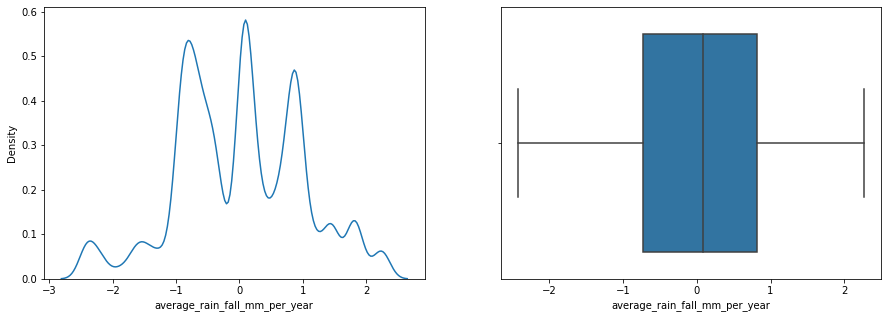

In [11]:
apply_transform('yeo-johnson', 'average_rain_fall_mm_per_year')

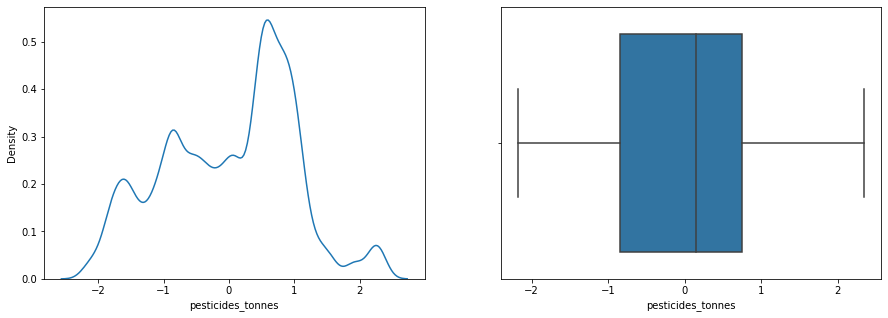

In [12]:
apply_transform('yeo-johnson', 'pesticides_tonnes')

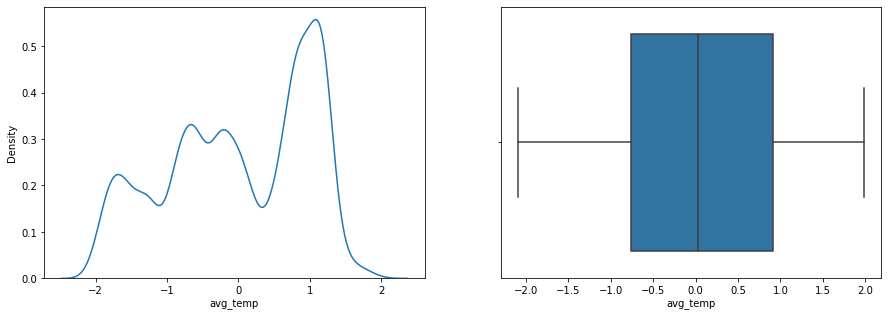

In [13]:
apply_transform('yeo-johnson', 'avg_temp')

In [14]:
df0

,Area,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,36613,0.602796,-1.542037,-0.810165
1,Albania,Potatoes,66667,0.602796,-1.542037,-0.810165
2,Albania,"Rice, paddy",23333,0.602796,-1.542037,-0.810165
3,Albania,Sorghum,12500,0.602796,-1.542037,-0.810165
4,Albania,Soybeans,7000,0.602796,-1.542037,-0.810165
...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",22581,-0.600969,-0.698807,-0.280644
28238,Zimbabwe,Sorghum,3066,-0.600969,-0.698807,-0.280644
28239,Zimbabwe,Soybeans,13142,-0.600969,-0.698807,-0.280644
28240,Zimbabwe,Sweet potatoes,22222,-0.600969,-0.698807,-0.280644


### One Hot Encoding

In [15]:
## One Hot Encoding

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse=False)
df_OHE = ohe.fit_transform(df0[['Area','Item']])
df_OHE

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [16]:
## after OHE, we concatenate the encoded numpy array with the array of remaining df0

import numpy as np

df1 = np.hstack(((df_OHE), df0[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].values))
df1

array([[ 0.        ,  0.        ,  0.        , ...,  0.6027959 ,
        -1.54203721, -0.8101654 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.6027959 ,
        -1.54203721, -0.8101654 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.6027959 ,
        -1.54203721, -0.8101654 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.6009691 ,
        -0.69880716, -0.2806444 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.6009691 ,
        -0.69880716, -0.2806444 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.6009691 ,
        -0.69880716, -0.2806444 ]])

### IsolationForest

In [17]:
## Outliers detection using IsolationForest

from sklearn.ensemble import IsolationForest

IF = IsolationForest(n_estimators=100, random_state=42)
IF.fit(df1)

IsolationForest(random_state=42)

In [18]:
avg_path_len_score = IF.decision_function(df1)
avg_path_len_score

array([0.18936918, 0.187934  , 0.18890342, ..., 0.16109726, 0.16009733,
       0.16465625])

In [19]:
anomaly = IF.predict(df1)
anomaly

array([1, 1, 1, ..., 1, 1, 1])

In [20]:
len(anomaly[anomaly == -1])

0

In [21]:
## stacking of 'df1' with 'avg_path_len_score' and 'anomaly'

df2 = np.hstack(((df1), (avg_path_len_score).reshape(28242, 1), (anomaly).reshape(28242, 1)))
df2

array([[ 0.        ,  0.        ,  0.        , ..., -0.8101654 ,
         0.18936918,  1.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.8101654 ,
         0.187934  ,  1.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.8101654 ,
         0.18890342,  1.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.2806444 ,
         0.16109726,  1.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.2806444 ,
         0.16009733,  1.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.2806444 ,
         0.16465625,  1.        ]])

In [22]:
df2.shape

(28242, 115)

In [23]:
## Droping of rows having anomaly == -1

df2 = np.delete(df2, np.where(df2[:,-1] == -1), 0)

In [24]:
## Droping 'avg_path_len_score' and 'anomaly' column

df3 = np.delete(df2, [113,114], 1)
df3

array([[ 0.        ,  0.        ,  0.        , ...,  0.6027959 ,
        -1.54203721, -0.8101654 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.6027959 ,
        -1.54203721, -0.8101654 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.6027959 ,
        -1.54203721, -0.8101654 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.6009691 ,
        -0.69880716, -0.2806444 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.6009691 ,
        -0.69880716, -0.2806444 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.6009691 ,
        -0.69880716, -0.2806444 ]])

In [25]:
df3.shape

(28242, 113)

### Standard Scaler (Standardization)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit and transform the scaler 
df4 = scaler.fit_transform(df3[:,0:109])

In [27]:
## stacking of standardized columns with the remaining columns

df_final = np.hstack(((df4), df3[:,110:113], df3[:,109].reshape(-1, 1)))
df_final

array([[-6.36623988e-02, -7.64255969e-02, -1.14901120e-01, ...,
        -1.54203721e+00, -8.10165400e-01,  3.66130000e+04],
       [-6.36623988e-02, -7.64255969e-02, -1.14901120e-01, ...,
        -1.54203721e+00, -8.10165400e-01,  6.66670000e+04],
       [-6.36623988e-02, -7.64255969e-02, -1.14901120e-01, ...,
        -1.54203721e+00, -8.10165400e-01,  2.33330000e+04],
       ...,
       [-6.36623988e-02, -7.64255969e-02, -1.14901120e-01, ...,
        -6.98807162e-01, -2.80644400e-01,  1.31420000e+04],
       [-6.36623988e-02, -7.64255969e-02, -1.14901120e-01, ...,
        -6.98807162e-01, -2.80644400e-01,  2.22220000e+04],
       [-6.36623988e-02, -7.64255969e-02, -1.14901120e-01, ...,
        -6.98807162e-01, -2.80644400e-01,  2.28880000e+04]])

In [28]:
df_final.shape

(28242, 113)

# Model

In [29]:
## Train-Test split

x = df_final[:,0:112]           
y = df_final[:,-1]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [30]:
x[:,0]

array([-0.0636624, -0.0636624, -0.0636624, ..., -0.0636624, -0.0636624,
       -0.0636624])

### PCA

In [31]:
## initializing the pca

from sklearn import decomposition
pca = decomposition.PCA()

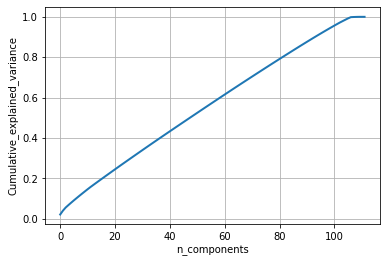

In [32]:
## PCA for dimensionality redcution

pca.n_components = 112
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

#### Observation :-
Since, the 'Cumulative_explained_variance' shows linear relationship with the 'n_components' in the PCA that why, its not reasonable to apply PCA as we can see from the above plot also. If we apply PCA with n_components around 50 then it will explain less than 70% of the variance of the whole data.

### Linear / Polynomial Regression

In [33]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [34]:
## Applying linear regression

lr = LinearRegression()
# training
lr.fit(x_train,y_train)
# prediction on Test Dataset
y_pred_lr_testD = lr.predict(x_test)
# prediction on Train Dataset
y_pred_lr_trainD = lr.predict(x_train)

print("--- For Test Dataset ---")
print("MAE",mean_absolute_error(y_test,y_pred_lr_testD))
print("MSE",mean_squared_error(y_test,y_pred_lr_testD))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_lr_testD)))
print("R2 score",r2_score(y_test,y_pred_lr_testD))
print("Adjusted R2 score", 1 - ((1-r2_score(y_test,y_pred_lr_testD))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))) 
print()
print("--- For Train Dataset ---")
print("MAE",mean_absolute_error(y_train,y_pred_lr_trainD))
print("MSE",mean_squared_error(y_train,y_pred_lr_trainD))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_lr_trainD)))
print("R2 score",r2_score(y_train,y_pred_lr_trainD))
print("Adjusted R2 score", 1 - ((1-r2_score(y_train,y_pred_lr_trainD))*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))

--- For Test Dataset ---
MAE 29560.91045089605
MSE 1783894627.0277524
RMSE 42236.176756753826
R2 score 0.7517263042968824
Adjusted R2 score 0.7484001495219124

--- For Train Dataset ---
MAE 29834.66684990498
MSE 1833665770.3418365
RMSE 42821.32378082019
R2 score 0.7463873302940077
Adjusted R2 score 0.7449422438569365


#### Observations :-

We can observe that the R2 score for both train and test dataset is resionable. So, it the case of neither underfitting nor overfitting.

In [35]:
## Applying Polynomial Regression
    
poly = PolynomialFeatures(degree=2, include_bias=True)   # if degree is 2 so every input column we get 3 transformed input column (i.e. if x is one input column then it give x^0, x^1 and x^2 column)
                                                         # if include_bias=True then it give x^0 term but if include_bias=False then it don't give x^0 term. Since x^0 is associated with beta_knot which is known as bias term
# polynomial transformation    
x_train_trans = poly.fit_transform(x_train)              # number of degree should be appropriate otherwise there is the chance of overfitting or underfitting
x_test_trans = poly.transform(x_test)
    
# training
lr.fit(x_train_trans,y_train)
# prediction on Test Dataset
y_pred_poly_testD = lr.predict(x_test_trans)
# prediction on Train Dataset
y_pred_poly_trainD = lr.predict(x_train_trans)
    
print("--- For Test Dataset ---")
print("MAE",mean_absolute_error(y_test,y_pred_poly_testD))
print("MSE",mean_squared_error(y_test,y_pred_poly_testD))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_poly_testD)))
print("R2 score",r2_score(y_test,y_pred_poly_testD))
print("Adjusted R2 score", 1 - ((1-r2_score(y_test,y_pred_poly_testD))*(x_test_trans.shape[0]-1)/(x_test_trans.shape[0]-x_test_trans.shape[1]-1))) 
print()
print("--- For Train Dataset ---")
print("MAE",mean_absolute_error(y_train,y_pred_poly_trainD))
print("MSE",mean_squared_error(y_train,y_pred_poly_trainD))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_poly_trainD)))
print("R2 score",r2_score(y_train,y_pred_poly_trainD))
print("Adjusted R2 score", 1 - ((1-r2_score(y_train,y_pred_poly_trainD))*(x_train_trans.shape[0]-1)/(x_train_trans.shape[0]-x_train_trans.shape[1]-1))) 


--- For Test Dataset ---
MAE 435034744369.9456
MSE 1.6035594743231268e+27
RMSE 40044468710711.18
R2 score -2.231755345512107e+17
Adjusted R2 score -9.309419639181964e+17

--- For Train Dataset ---
MAE 10354.943187566392
MSE 327346024.075237
RMSE 18092.70637785395
R2 score 0.9547250647167361
Adjusted R2 score 0.9328434816027943


#### Observations :-

We can observe that the R2 score for train data is high and for test data is low. So, it is the case of overfitting.

### Support Vector Regressor

In [36]:
## Applying Support Vector Regressor

from sklearn.svm import SVR

svr = SVR(kernel="linear")
# training
svr.fit(x_train,y_train)
# prediction on Test Dataset
y_pred_svr_testD = svr.predict(x_test)
# prediction on Train Dataset
y_pred_svr_trainD = svr.predict(x_train)

print("--- For Test Dataset ---")
print("MAE",mean_absolute_error(y_test,y_pred_svr_testD))
print("MSE",mean_squared_error(y_test,y_pred_svr_testD))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_svr_testD)))
print("R2 score",r2_score(y_test,y_pred_svr_testD))
print("Adjusted R2 score", 1 - ((1-r2_score(y_test,y_pred_svr_testD))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))) 
print()
print("--- For Train Dataset ---")
print("MAE",mean_absolute_error(y_train,y_pred_svr_trainD))
print("MSE",mean_squared_error(y_train,y_pred_svr_trainD))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_svr_trainD)))
print("R2 score",r2_score(y_train,y_pred_svr_trainD))
print("Adjusted R2 score", 1 - ((1-r2_score(y_train,y_pred_svr_trainD))*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))

--- For Test Dataset ---
MAE 44851.2464284077
MSE 6398464539.068653
RMSE 79990.40279351425
R2 score 0.10949312034941983
Adjusted R2 score 0.09756288464118235

--- For Train Dataset ---
MAE 45667.099279686816
MSE 6512786502.876216
RMSE 80701.83704771668
R2 score 0.0992223343343146
Adjusted R2 score 0.09408969806271528


### Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
# training
rfr.fit(x_train,y_train)
# prediction on Test Dataset
y_pred_rfr_testD = rfr.predict(x_test)
# prediction on Train Dataset
y_pred_rfr_trainD = rfr.predict(x_train)

print("--- For Test Dataset ---")
print("MAE",mean_absolute_error(y_test,y_pred_rfr_testD))
print("MSE",mean_squared_error(y_test,y_pred_rfr_testD))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_rfr_testD)))
print("R2 score",r2_score(y_test,y_pred_rfr_testD))
print("Adjusted R2 score", 1 - ((1-r2_score(y_test,y_pred_rfr_testD))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))) 
print()
print("--- For Train Dataset ---")
print("MAE",mean_absolute_error(y_train,y_pred_rfr_trainD))
print("MSE",mean_squared_error(y_train,y_pred_rfr_trainD))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_rfr_trainD)))
print("R2 score",r2_score(y_train,y_pred_rfr_trainD))
print("Adjusted R2 score", 1 - ((1-r2_score(y_train,y_pred_rfr_trainD))*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))

--- For Test Dataset ---
MAE 5399.3866124493325
MSE 177210889.51508757
RMSE 13312.058049568728
R2 score 0.9753366584594443
Adjusted R2 score 0.9750062404866522

--- For Train Dataset ---
MAE 2102.6875245557508
MSE 26664374.587207817
RMSE 5163.755860534831
R2 score 0.9963120742424931
Adjusted R2 score 0.9962910604205131


### Gradient Boosting Regressor

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
# training
gbr.fit(x_train,y_train)
# prediction on Test Dataset
y_pred_gbr_testD = gbr.predict(x_test)
# prediction on Train Dataset
y_pred_gbr_trainD = gbr.predict(x_train)

print("--- For Test Dataset ---")
print("MAE",mean_absolute_error(y_test,y_pred_gbr_testD))
print("MSE",mean_squared_error(y_test,y_pred_gbr_testD))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_gbr_testD)))
print("R2 score",r2_score(y_test,y_pred_gbr_testD))
print("Adjusted R2 score", 1 - ((1-r2_score(y_test,y_pred_gbr_testD))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))) 
print()
print("--- For Train Dataset ---")
print("MAE",mean_absolute_error(y_train,y_pred_gbr_trainD))
print("MSE",mean_squared_error(y_train,y_pred_gbr_trainD))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred_gbr_trainD)))
print("R2 score",r2_score(y_train,y_pred_gbr_trainD))
print("Adjusted R2 score", 1 - ((1-r2_score(y_train,y_pred_gbr_trainD))*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)))

--- For Test Dataset ---
MAE 24897.241377953585
MSE 1652064330.9950194
RMSE 40645.59423842908
R2 score 0.7700737976441862
Adjusted R2 score 0.7669934466078403

--- For Train Dataset ---
MAE 24834.617735953936
MSE 1664300156.552293
RMSE 40795.8350392818
R2 score 0.7698121365832982
Adjusted R2 score 0.768500524825938


### ANN

In [39]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [40]:
ann = Sequential()

ann.add(Dense(112, activation = 'relu', input_dim = 112))
ann.add(Dropout(0.2))
ann.add(Dense(50, activation = 'relu'))
ann.add(Dropout(0.2))
ann.add(Dense(1, activation = 'linear'))         # for linear regression, activation function of output layer is always linear

ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 112)               12656     
                                                                 
 dropout (Dropout)           (None, 112)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5650      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 18,357
Trainable params: 18,357
Non-trainable params: 0
_________________________________________________________________


In [41]:
ann.compile(loss = 'mean_squared_error', optimizer = 'Adam')

In [42]:
history = ann.fit(x_train, y_train, epochs = 100, validation_split = 0.3)

Epoch 1/100
433/433 [==============================] - 3s 5ms/step - loss: 12909400064.0000 - val_loss: 12454408192.0000
Epoch 2/100
433/433 [==============================] - 2s 4ms/step - loss: 9880654848.0000 - val_loss: 7372976640.0000
Epoch 3/100
433/433 [==============================] - 2s 4ms/step - loss: 5099719168.0000 - val_loss: 3764783104.0000
Epoch 4/100
433/433 [==============================] - 2s 4ms/step - loss: 3130153984.0000 - val_loss: 2743502592.0000
Epoch 5/100
433/433 [==============================] - 2s 4ms/step - loss: 2509028352.0000 - val_loss: 2318000896.0000
Epoch 6/100
433/433 [==============================] - 2s 4ms/step - loss: 2234348288.0000 - val_loss: 2094192768.0000
Epoch 7/100
433/433 [==============================] - 2s 4ms/step - loss: 2084101376.0000 - val_loss: 1964043904.0000
Epoch 8/100
433/433 [==============================] - 2s 4ms/step - loss: 1952986496.0000 - val_loss: 1874242560.0000
Epoch 9/100
433/433 [=========================

Epoch 70/100
433/433 [==============================] - 2s 4ms/step - loss: 876915520.0000 - val_loss: 739106560.0000
Epoch 71/100
433/433 [==============================] - 2s 4ms/step - loss: 871243392.0000 - val_loss: 737051264.0000
Epoch 72/100
433/433 [==============================] - 2s 4ms/step - loss: 858500096.0000 - val_loss: 726764928.0000
Epoch 73/100
433/433 [==============================] - 2s 4ms/step - loss: 849188672.0000 - val_loss: 720411392.0000
Epoch 74/100
433/433 [==============================] - 2s 4ms/step - loss: 854291264.0000 - val_loss: 716250048.0000
Epoch 75/100
433/433 [==============================] - 2s 4ms/step - loss: 835957248.0000 - val_loss: 713742144.0000
Epoch 76/100
433/433 [==============================] - 2s 4ms/step - loss: 861027968.0000 - val_loss: 707384896.0000
Epoch 77/100
433/433 [==============================] - 2s 4ms/step - loss: 825936704.0000 - val_loss: 700300928.0000
Epoch 78/100
433/433 [==============================] - 

In [43]:
y_pred_ann = ann.predict(x_test) 
r2_score(y_test, y_pred_ann)

265/265 [==============================] - 1s 2ms/step


0.9215656492720136

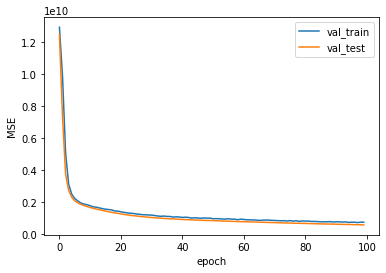

In [44]:
plt.plot(history.history['loss'], label="val_train")    # it gives how our training loss reduces while going from 1 to 100 epochs
plt.plot(history.history['val_loss'], label="val_test")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

#### Observation :-

Random Forest Regressor perform best.